## Dataset download
[Link to the Dataset](https://www.kaggle.com/datasets/gpiosenka/100-bird-species)

Download the dataset and extract it into 'Data' folder.
 
**OR**

Uncomment and Use the following kaggle commands

In [ ]:
# ! pip install -q kaggle

In [ ]:
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/

# ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# ! kaggle datasets download -d gpiosenka/100-bird-species

In [ ]:
# ! unzip /content/100-bird-species.zip data

## Importing libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import pathlib, os, random

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential

# Visualizing data

In [ ]:
num_of_bird_groups = len(os.listdir("/content/data/train"))
num_of_bird_groups

FileNotFoundError: ignored

In [ ]:
train_dir = "/content/data/train/"
test_dir = "/content/data/test/"
val_dir = "/content/data/valid/"

Found 70626 files belonging to 450 classes.


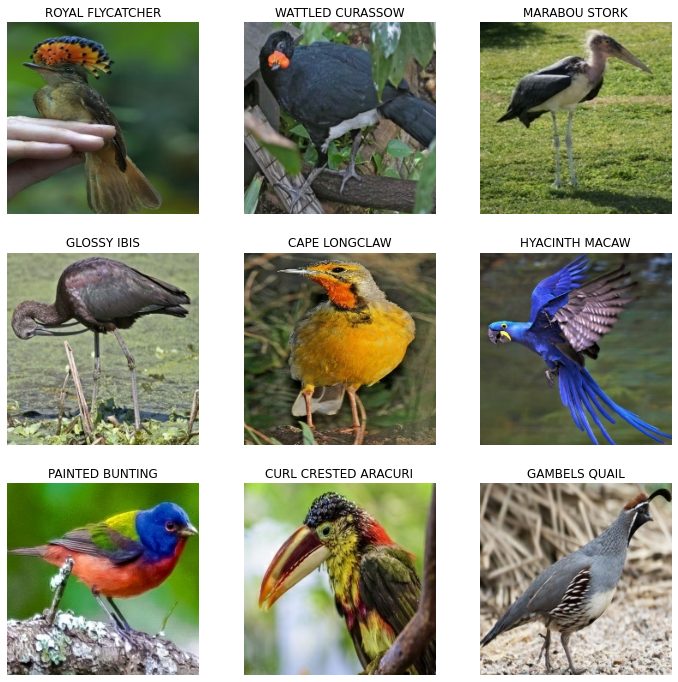

In [ ]:
# The first nine images and labels from training set
BATCH_SIZE = 32
IMG_SIZE = (224,224)

train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

class_names = train_dataset.class_names

plt.figure(figsize=(12,12))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# Preprocessing data

In [ ]:
# Data Augmentation of training dataset
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=5,
                                   width_shift_range=0.05,
                                   height_shift_range=0.05,
                                   shear_range=0.05,
                                   zoom_range=0.05,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# data transfer from directories to batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size= 32,
                                               target_size= (224,224),
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "categorical")

val_data = valid_datagen.flow_from_directory(directory = val_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "categorical")

Found 70626 images belonging to 450 classes.
Found 2250 images belonging to 450 classes.
Found 2250 images belonging to 450 classes.


# Basic model

In [ ]:
model0 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', input_shape = (224,224, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(450, activation='softmax')
])

In [ ]:
model0.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 111, 111, 128)    0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 111, 111, 128)     0         
                                                                 
 conv2d_19 (Conv2D)          (None, 109, 109, 64)      73792     
                                                                 
 dense_17 (Dense)            (None, 109, 109, 64)      4160      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                 

In [ ]:
model0.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
history0 = model0.fit(train_data,
                      epochs=3,
                      batch_size=128,
                      steps_per_epoch = len(train_data),
                      validation_data = val_data,
                      validation_steps = int(0.25*len(val_data)),)

Epoch 1/3
2208/2208 [==============================] - 326s 147ms/step - loss: 4.7903 - accuracy: 0.1415 - val_loss: 3.1566 - val_accuracy: 0.3346
Epoch 2/3
2208/2208 [==============================] - 320s 145ms/step - loss: 2.4286 - accuracy: 0.5018 - val_loss: 2.3575 - val_accuracy: 0.4982
Epoch 3/3
2208/2208 [==============================] - 323s 146ms/step - loss: 0.7103 - accuracy: 0.8397 - val_loss: 3.2455 - val_accuracy: 0.4577


## Test data evaluation

In [ ]:
model0.evaluate(test_data)

71/71 [==============================] - 5s 74ms/step - loss: 3.1058 - accuracy: 0.4502


[3.1058053970336914, 0.4502222239971161]

In [ ]:
def plot_loss_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure() 
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

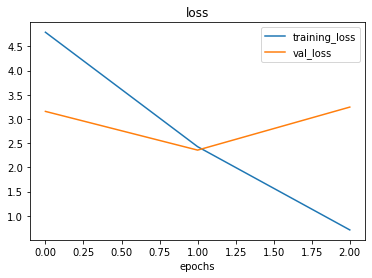

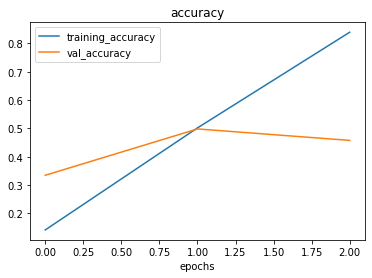

In [ ]:
plot_loss_curves(history0)

# Using pretrained model

In [ ]:
pretrained_model=tf.keras.applications.resnet_v2.ResNet101V2(input_shape=(224,224,3),
                                                              include_top=False,
                                                              weights='imagenet')
pretrained_model.trainable = False

171317808/171317808 [==============================] - 1s 0us/step


In [ ]:
model1 = tf.keras.Sequential([  
    pretrained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=450, activation="softmax"),
])
model1.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 7, 7, 2048)        42626560  
                                                                 
 flatten_11 (Flatten)        (None, 100352)            0         
                                                                 
 dense_22 (Dense)            (None, 450)               45158850  
                                                                 
Total params: 87,785,410
Trainable params: 45,158,850
Non-trainable params: 42,626,560
_________________________________________________________________


In [ ]:
model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history1 = model1.fit(train_data,
                      epochs=3,
                      batch_size=128,
                      steps_per_epoch = len(train_data),
                      validation_data = val_data,
                      validation_steps = int(0.25*len(val_data)),)

Epoch 1/3
2208/2208 [==============================] - 374s 166ms/step - loss: 23.3157 - accuracy: 0.6244 - val_loss: 15.7266 - val_accuracy: 0.7812
Epoch 2/3
2208/2208 [==============================] - 371s 168ms/step - loss: 6.0233 - accuracy: 0.9016 - val_loss: 11.8264 - val_accuracy: 0.8456
Epoch 3/3
2208/2208 [==============================] - 369s 167ms/step - loss: 4.3248 - accuracy: 0.9316 - val_loss: 15.1513 - val_accuracy: 0.8474


## Test data evaluation

In [ ]:
model1.evaluate(test_data)

71/71 [==============================] - 11s 160ms/step - loss: 14.1566 - accuracy: 0.8489


[14.156645774841309, 0.8488888740539551]

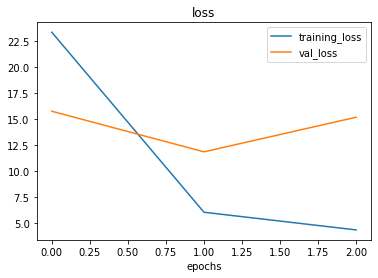

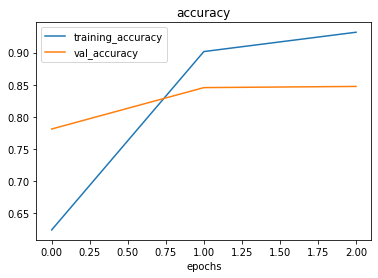

In [ ]:
plot_loss_curves(history1)

# Environment Used

```
tensorflow==2.9.2
numpy==1.21.6
matplotlib==3.2.2
pandas==1.3.5
```

